
# IPL Data Analysis

This notebook provides an insightful analysis of IPL data using Python. The analysis is organized into different sections such as Bowler Statistics, Batsman Performance, and Match Insights.

---
    

In [1]:

# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring plots display inline
%matplotlib inline
    

## Loading Datasets

In [2]:

# Load the match and delivery datasets
match_data = pd.read_csv("matches.csv")
delivery_data = pd.read_csv("deliveries.csv")
print("Datasets loaded successfully.")
    

Datasets loaded successfully.


## Bowler Statistics

In [3]:

# Bowler Economy Analysis
bowler_stats = delivery_data.groupby("bowler").agg({
    "batsman_runs": "sum", 
    "ball": "count"
}).sort_values(by="ball", ascending=False)
bowler_stats["economy"] = bowler_stats["batsman_runs"] / (bowler_stats["ball"] / 6)

# Display top 10 bowlers with the best economy
top_bowlers = bowler_stats.sort_values(by="economy").head(10)
top_bowlers.style.background_gradient(cmap="coolwarm")
    

,batsman_runs,ball,economy
bowler,,,
AC Gilchrist,0,1,0.000000
N Rana,3,6,3.000000
NB Singh,14,25,3.360000
LA Carseldine,5,7,4.285714
SS Mundhe,5,7,4.285714
Sachin Baby,8,10,4.800000
AM Rahane,5,6,5.000000
DJ Thornely,38,44,5.181818
Mohammad Nabi,58,66,5.272727


In [4]:

# Total dismissals by bowlers
dismissals = delivery_data.groupby("bowler").agg({
    "player_dismissed": "count"
}).sort_values(by="player_dismissed", ascending=False).head(10)
dismissals.style.background_gradient(cmap="viridis")
    

,player_dismissed
bowler,
SL Malinga,170
A Mishra,142
DJ Bravo,137
Harbhajan Singh,136
PP Chawla,133
R Vinay Kumar,125
A Nehra,121
Z Khan,119
B Kumar,117


## Match Insights

In [5]:

# City with the Most Matches Won
city_match_counts = match_data.groupby("city").agg({"winner": "count"}).sort_values(by="winner", ascending=False)
top_city = city_match_counts.head(1)
top_city.style.background_gradient(cmap="Greens")
    

,winner
city,
Mumbai,85


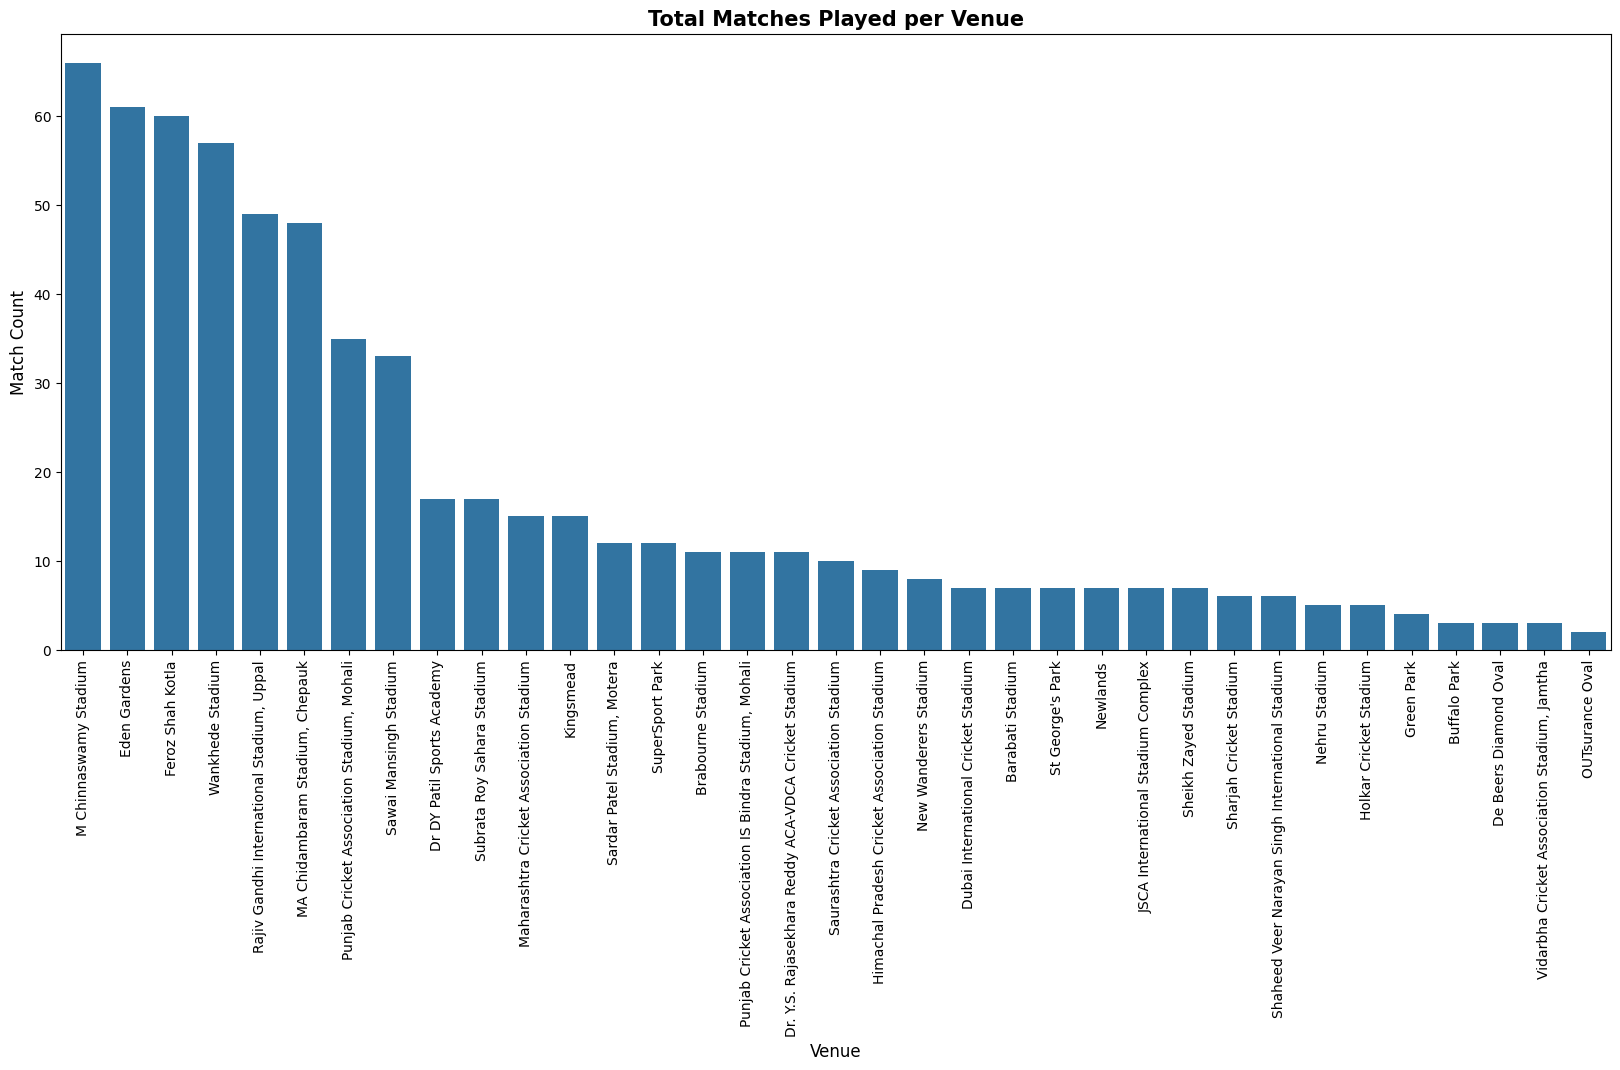

In [6]:

# Visualizing Total Matches Played in Each Venue
plt.figure(figsize=(20, 8))
sns.countplot(x="venue", data=match_data, order=match_data["venue"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Venue", fontsize=12)
plt.ylabel("Match Count", fontsize=12)
plt.title("Total Matches Played per Venue", fontsize=15, fontweight="bold")
plt.show()
    

## Average Runs Scored Per Match  

Average runs scored per match: 305.53


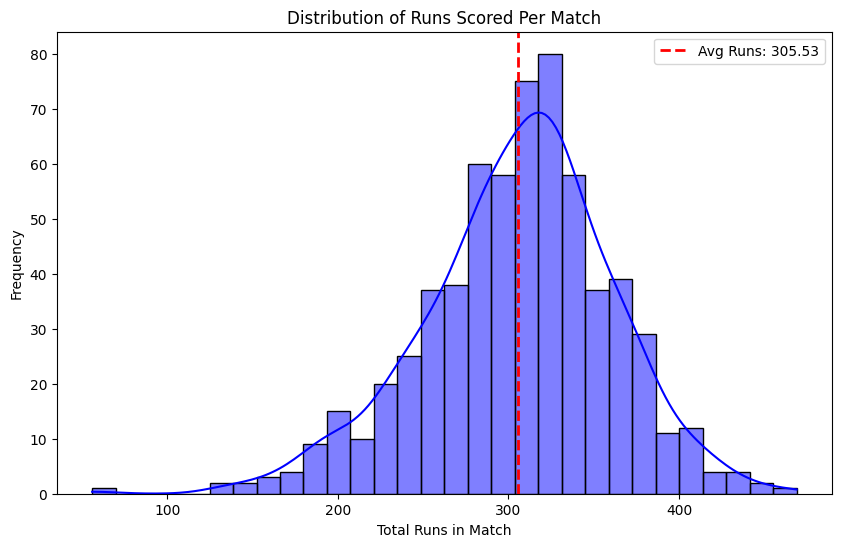

In [13]:
# Average Runs Scored Per Match Analysis
match_runs = delivery_data.groupby("match_id")["total_runs"].sum()
average_runs = match_runs.mean()

# Display the result
print(f"Average runs scored per match: {average_runs:.2f}")

# Visualizing the distribution of total runs per match
plt.figure(figsize=(10, 6))
sns.histplot(match_runs, bins=30, kde=True, color="blue")
plt.axvline(average_runs, color='red', linestyle='dashed', linewidth=2, label=f"Avg Runs: {average_runs:.2f}")
plt.xlabel("Total Runs in Match")
plt.ylabel("Frequency")
plt.title("Distribution of Runs Scored Per Match")
plt.legend()
plt.show()

## Batsman Performance

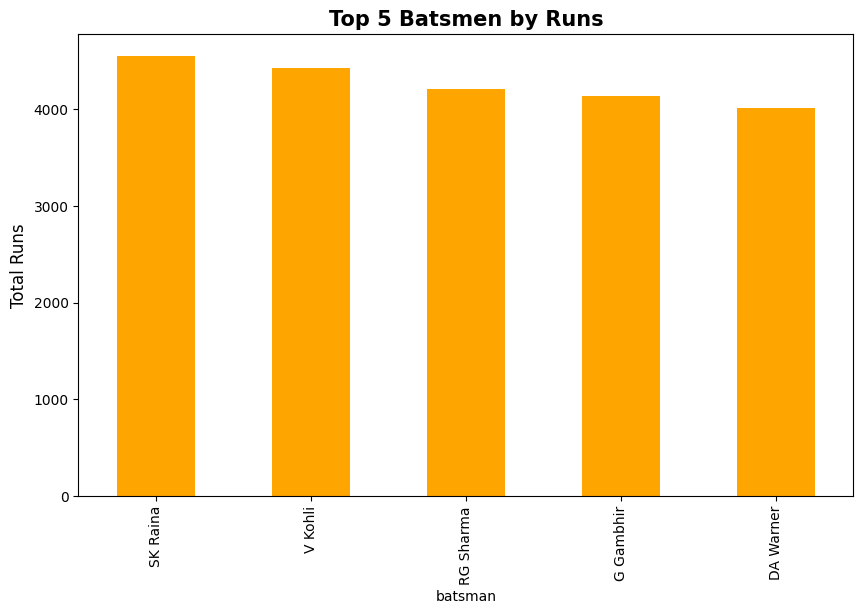

In [7]:

# Top 5 Batsmen by Total Runs
top_batsmen = delivery_data.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False).head(5)
top_batsmen.plot(kind="bar", color="orange", figsize=(10, 6))
plt.title("Top 5 Batsmen by Runs", fontsize=15, fontweight="bold")
plt.ylabel("Total Runs", fontsize=12)
plt.show()
    

In [8]:

# Strike Rate Analysis
strike_rate = delivery_data.groupby("batsman").agg({"ball": "count", "batsman_runs": "sum"})
strike_rate["strike_rate"] = strike_rate["batsman_runs"] / strike_rate["ball"] * 100
top_strike_rate = strike_rate.sort_values(by="strike_rate", ascending=False).head(10)
top_strike_rate.style.background_gradient(cmap="coolwarm")
    

,ball,batsman_runs,strike_rate
batsman,,,
DL Chahar,6,14,233.333333
Umar Gul,19,39,205.263158
RS Sodhi,2,4,200.000000
BCJ Cutting,70,124,177.142857
AJ Tye,30,53,176.666667
Shahid Afridi,46,81,176.086957
I Malhotra,4,7,175.000000
SN Khan,103,177,171.844660
CR Brathwaite,56,95,169.642857


## Toss Analysis

C:\Users\chaitanya raut\AppData\Local\Temp\ipykernel_11824\1494992976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="toss_decision", data=match_data, palette="Set2")


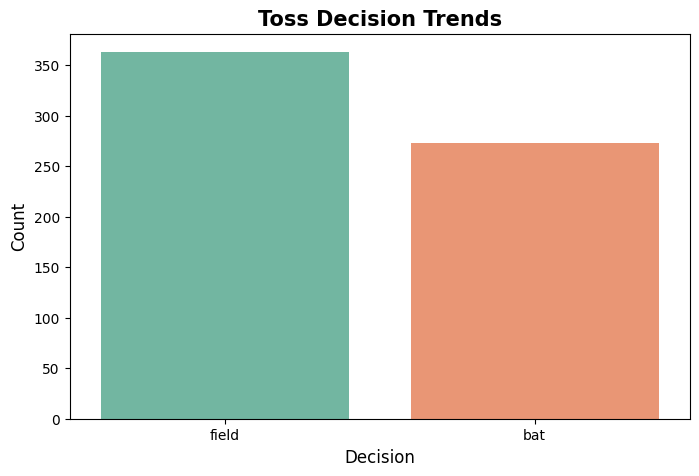

In [9]:

# Visualizing Toss Decisions
plt.figure(figsize=(8, 5))
sns.countplot(x="toss_decision", data=match_data, palette="Set2")
plt.title("Toss Decision Trends", fontsize=15, fontweight="bold")
plt.xlabel("Decision", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()
    

## Most Player of the Match Awards  
Analyzing the players who have won the most "Player of the Match" awards in IPL history.

Top 10 Players with Most 'Player of the Match' Awards:


player_of_match
CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: count, dtype: int64

C:\Users\chaitanya raut\AppData\Local\Temp\ipykernel_11824\361429710.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_of_match_counts.index, y=player_of_match_counts.values, palette="coolwarm")


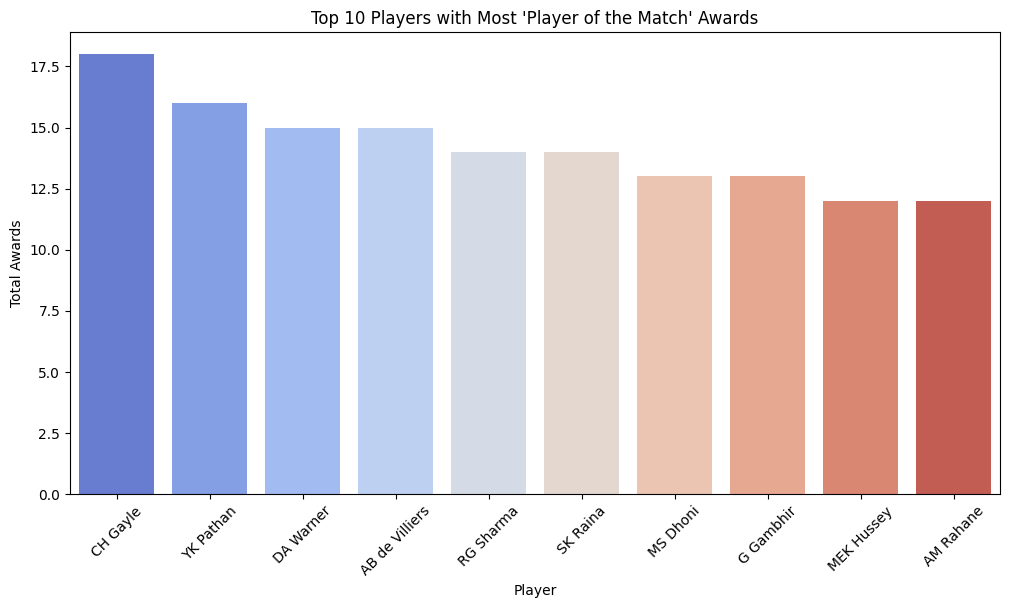

In [12]:
# Most Player of the Match Awards Analysis
player_of_match_counts = match_data["player_of_match"].value_counts().head(10)

# Display the results
print("Top 10 Players with Most 'Player of the Match' Awards:")
display(player_of_match_counts)

# Visualizing the top 10 players with the most awards
plt.figure(figsize=(12, 6))
sns.barplot(x=player_of_match_counts.index, y=player_of_match_counts.values, palette="coolwarm")
plt.xlabel("Player")
plt.ylabel("Total Awards")
plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.xticks(rotation=45)
plt.show()


### Key Takeaways:
- **Bowling Analysis**: Insights on bowler economy and dismissals were highlighted.
- **Match Analysis**: Venue-based performance was visualized to show preferences.
- **Batsman Insights**: Key performers were identified based on runs and strike rates.
- **Toss Analysis**: Trends in toss decisions were explored for strategic understanding.
    